# **Project Introduction**

- **TITLE** : Predicting Income Levels Using Census Data with Machine Learning
- **Objective**:
The primary goal of this project is to develop a machine learning model that accurately predicts whether an individual's income exceeds $50K per year, based on census data.
This will involve exploring and understanding the data, engineering relevant features, building a predictive model, and evaluating its performance using appropriate metrics.
Insights derived from the model will highlight the most influential factors affecting income levels.

In [1]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder # Label Encoder
from sklearn.preprocessing import OneHotEncoder # One hot Encoder
from sklearn.preprocessing import StandardScaler # Standard scaler
from sklearn.preprocessing import MinMaxScaler # minmax scaler

from scipy.stats import randint, uniform# random integer, uniform
from sklearn.model_selection import train_test_split # test split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV # gridsearch cross validation
from sklearn.model_selection import RandomizedSearchCV # import randomized Search cross validation
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore") # ignoring warnings
plt.style.use("ggplot") # setting plt style

In [2]:
# import the dataset
df = pd.read_excel(r"C:\Users\hp\Desktop\Data Science YouThrive\income_data.xlsx")

# returning the first 5 rows in the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# making a copy of the dataset
df_copy = df.copy()
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleaning

In [4]:
# Checking the columns in the dataset and printing the shape
print(df.columns)
print("The shape of the the dataset is:",df.shape)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
The shape of the the dataset is: (48842, 15)


In [5]:
# rename column names for easy identification
rename_column = df.rename(columns= {"fnlwgt": "final_weight", "education-num": "education_num", "marital-status": "marital_status",
                    "capital-gain": "capital_gain", "capital-loss": "capital_loss", "hours-per-week": "hours_per_week",
                    "native-country": "native_country"})
df = rename_column
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Review data types and summary statistics 
print(df.dtypes)

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
display(df.describe())

# Summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
display(df.describe(include=['O']))

print(df.info())

age                int64
workclass         object
final_weight       int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

Summary statistics for numerical columns:


,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000



Summary statistics for categorical columns:


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,47879,48842,48842,47876,48842,48842,48842,48568,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   final_weight    48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [7]:
# Checking for the null values
df.isna().sum()

age                 0
workclass         963
final_weight        0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [8]:
# removing the null
df.dropna(inplace = True)
df.shape
print("The shape before removing blank: ", df_copy.shape)
print("The shape after removing blank:", df.shape)

The shape before removing blank:  (48842, 15)
The shape after removing blank: (47621, 15)


In [9]:
# Blank removed
df.isna().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# checking the dataset for duplicates rows and displaying them
# df[df.duplicated()].head()
duplicates = df[df.duplicated()]

#show duplicates
duplicates

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [11]:
# removing the duplicates in the dataset

df = df.drop_duplicates()
display(df.head())

print("The shape before removing duplicates :",df_copy.shape)
print("The shape after removing duplicates :",df.shape)

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The shape before removing duplicates : (48842, 15)
The shape after removing duplicates : (47573, 15)


In [12]:
# identifying cells affected with"?"
que_mark = df[df.isin(["?"]).any(axis=1)]
que_mark = pd.DataFrame(que_mark)
que_mark.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K


In [12]:
# Handling the error by changing to nan
df.replace("?", np.nan, inplace=True)

# removing rows affected
df = df.dropna()

print("The shape before removing the error:", df_copy.shape)
print("The shape before after the error:", df.shape)

df.head()

The shape before removing the error: (48842, 15)
The shape before after the error: (45175, 15)


,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory Data Analysis (EDA)

# sex distribution
sex_counts = df['sex'].value_counts()

plt.figure(figsize=(6,4))

#Axis
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

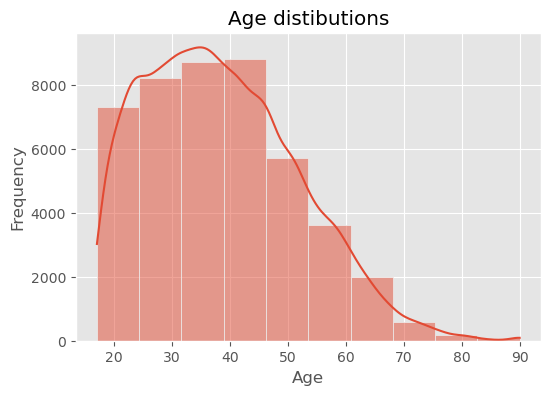

In [13]:
# Age distribution using Histogram
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins =10, kde=True)
plt.title('Age distibutions') # chart title
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.show()

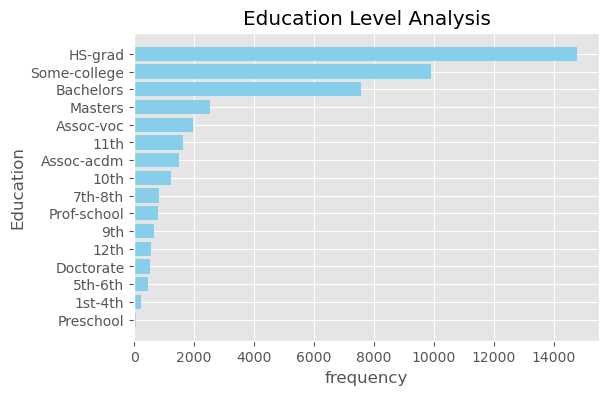

In [14]:
# Education level Analysis
education_counts = df['education'].value_counts()
# extract the x and y axis
x = education_counts.index
y = education_counts.values

plt.figure(figsize=(6,4))
# create horizontal barchart
plt.barh(x,y,color='skyblue')

# Invert the y-axis to ensure the highest count is at the top
plt.gca().invert_yaxis()

# Add title (optional)
plt.title("Education Level Analysis")

plt.xlabel("frequency")
plt.ylabel("Education")


# show plot
plt.show()

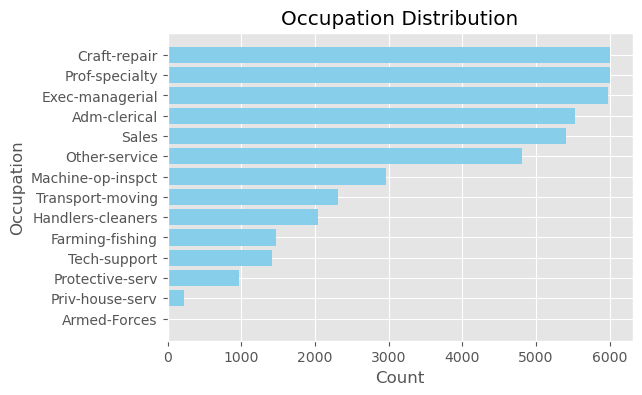

In [15]:
# occupation
occupation_counts = df['occupation'].value_counts()

# extract the x and y axis
x = occupation_counts.index
y = occupation_counts.values
# Create the horizontal bar chart
plt.figure(figsize=(6,4))
plt.barh(x, y, color='skyblue')

# Add title and labels
plt.title("Occupation Distribution")
plt.xlabel("Count")
plt.ylabel("Occupation")

# Invert the y-axis to ensure the highest count is at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [16]:
numerical_df = df.select_dtypes(include= np.number)

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
correlation_matrix

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.075590,0.037269,0.079649,0.059258,0.101604
final_weight,-0.075590,1.000000,-0.041992,-0.004118,-0.004359,-0.018712
education_num,0.037269,-0.041992,1.000000,0.126982,0.081719,0.146463
capital_gain,0.079649,-0.004118,0.126982,1.000000,-0.032137,0.083868
capital_loss,0.059258,-0.004359,0.081719,-0.032137,1.000000,0.054141
hours_per_week,0.101604,-0.018712,0.146463,0.083868,0.054141,1.000000


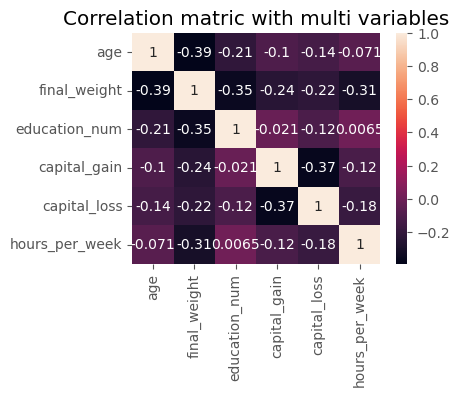

In [17]:
# creating heat map to find the correlation with multi variables
plt.figure(figsize=(4,3))
sns.heatmap(correlation_matrix.corr(), annot=True)
plt.title("Correlation matric with multi variables")
plt.show()

## Data Preprocessing and Feature Engineering

In [18]:
# already cleaned dataset
df.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
# checking the dataset for blanks
df.isna().sum()

age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

## Encoding categorical variables

In [20]:
# Splitting the table df into numerical Variables and categorial variables

cat_variables = df.select_dtypes(exclude=np.number)

num_variables = df.select_dtypes(include=np.number)

num_variables.head()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [21]:
# encoding the target lebel (income) using label encoder
label = cat_variables['income']

# Applying label encoder
encoder = LabelEncoder()

# Fit and transform the categorical variables
label_enc = encoder.fit_transform(label)

# converting label_enc into Series
label_new = pd.Series(label_enc)
print(label.unique())
label_new.unique()

['<=50K' '>50K']


array([0, 1])

In [22]:
#Encoding the categorical variable using onehotEncoding
# Drop 'income' from the feature set and encode other categorical features
new_table = cat_variables.drop('income', axis=1) 

# Applying onehotEncoding
one_hot = OneHotEncoder(sparse_output=False)

# Fit and transform the categorical variables
ohe_label = one_hot.fit_transform(new_table)

# Get feature names from the OneHotEncoder
feature_names = one_hot.get_feature_names_out(new_table.columns)

# Convert the one-hot encoded data into a DataFrame
enc_features = pd.DataFrame(ohe_label, columns=feature_names)

# Display the first few rows of the encoded DataFrame
enc_features.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Scalling 

In [23]:
# initializing the standard scaler
std_scalar = StandardScaler()

# Scaling the numerical variable
num_scaled = std_scalar.fit_transform(num_variables)

# Converting the scaled numerical variable into pandas and adding its column header
num_scaled = pd.DataFrame(num_scaled, columns = num_variables.columns)

# Display first few rows
num_scaled.head()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
0,0.033585,-1.062200,1.128923,0.142663,-0.218899,-0.078493
1,0.865959,-1.007350,1.128923,-0.146811,-0.218899,-2.327069
2,-0.042086,0.245214,-0.438652,-0.146811,-0.218899,-0.078493
3,1.092971,0.425761,-1.222440,-0.146811,-0.218899,-0.078493
4,-0.798790,1.407179,1.128923,-0.146811,-0.218899,-0.078493


In [24]:
# Merging the numerical scaled data with the encoded categorical variable
processed_dt = pd.concat([num_scaled, enc_features], axis=1)

# Display first few rows
processed_dt.head()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.033585,-1.062200,1.128923,0.142663,-0.218899,-0.078493,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.865959,-1.007350,1.128923,-0.146811,-0.218899,-2.327069,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.042086,0.245214,-0.438652,-0.146811,-0.218899,-0.078493,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.092971,0.425761,-1.222440,-0.146811,-0.218899,-0.078493,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.798790,1.407179,1.128923,-0.146811,-0.218899,-0.078493,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Development

In [25]:
# Test train using random forest
# Split processed data into features and target

X = processed_dt # Features
y = label_new # Target

# Train-Test split (80% train, 20% test) test size = 0.2 ramdom_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestClassifier()

# Define the range for hyperparameters
param_dist = {
    'n_estimators' : [10, 50, 100],   # number of estimator
    'max_depth' : [None,10,20],
    'min_samples_split' : [2,5,10]
}

# Set up gridsearchcv
rf_model = GridSearchCV(estimator = rf, param_grid = param_dist,
                           scoring = 'accuracy', cv =2, 
                        n_jobs =-1)

# fit the model
rf_model.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters found: ", rf_model.best_params_)
print("Best cross-validation accuracy: ", rf_model.best_score_)

Best parameters found:  {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation accuracy:  0.8581350304371886


## Model Evaluation

In [26]:
# print the model accuracy on the training data
# prediction
y_pred = rf_model.predict(X_test)
y_prob_proba_rf = rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
roc_auc = roc_auc_score(y_test, y_prob_proba_rf)


print("Accuracy:",round(accuracy,4)) # rounded to 4 decimal place
print("Precision:",round(precision,4)) # rounded to 4 decimal place
print("Recall:",round(recall,4)) # rounded to 4 decimal place
print("f1:",round(f1,4)) # rounded to 4 decimal place
print("ROC_AUC:", round(roc_auc,4)) # rounded to 4 decimal place

# Show the classification report
print("\nRandon forest Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.866
Precision: 0.8609
Recall: 0.866
f1: 0.8609
ROC_AUC: 0.9171

Randon forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      6830
           1       0.78      0.63      0.70      2205

    accuracy                           0.87      9035
   macro avg       0.83      0.79      0.81      9035
weighted avg       0.86      0.87      0.86      9035



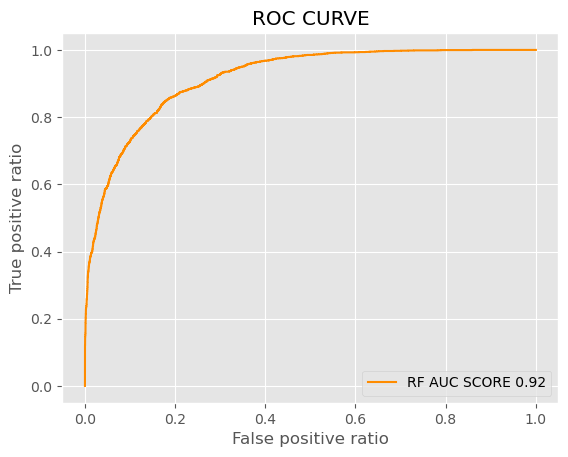

In [27]:
# random forest model performance using ROC_CURVE

fpr, tpr, thresholds = roc_curve(y_test, y_prob_proba_rf)
roc_score_rf = auc(fpr, tpr)

# plotting the roc_curve
plt.plot(fpr,tpr, color = "darkorange", label=f"RF AUC SCORE {roc_score_rf:.2f}")
plt.ylabel("True positive ratio") # X axis label
plt.xlabel("False positive ratio") # y axis label
plt.title("ROC CURVE") # Chart title
plt.legend() # Legend
plt.show() # Show chart

Random forest confusion matrix: 
 [[6436  394]
 [ 817 1388]]


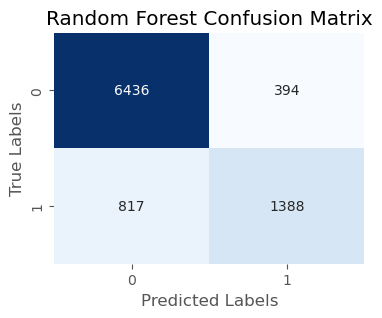

In [28]:
# Confusion matrix random forest

rf_cm = confusion_matrix(y_test,y_pred)
print("Random forest confusion matrix: \n",rf_cm)
plt.figure(figsize=(4,3))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues",cbar=False)
plt.title('Random Forest Confusion Matrix') # Chart title
plt.xlabel('Predicted Labels') # X axis label
plt.ylabel('True Labels') # y axis label
plt.show() # Show Chart

### Using logistic regression algorithm

In [29]:
# Define the model
log_Reg = LogisticRegression(max_iter =200)

# Define the range for hyperparameter 
param_dist = {
    'C': [0.01, 0.1,1,10,100],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers to try
}

# Set up gridsearchcv
logr_model= GridSearchCV(estimator = log_Reg, param_grid = param_dist,
                      scoring = 'accuracy', cv =2, 
                          n_jobs =-1)
# fit the model
logr_model.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters found: ", logr_model.best_params_)
print("Best cross-validation accuracy: ", logr_model.best_score_)

Best parameters found:  {'C': 1, 'solver': 'liblinear'}
Best cross-validation accuracy:  0.8475926950747095


In [30]:
# print the model accuracy on the training data
# prediction
y_pred_log = logr_model.predict(X_test)
y_prob_proba_log = logr_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
roc_auc_log = roc_auc_score(y_test, y_prob_proba_log)

print("Accuracy",round(accuracy,4))  # rounded to 4 decimal place
print("Precision",round(precision,4))  # rounded to 4 decimal place
print("Recall",round(recall,4))  # rounded to 4 decimal place
print("f1",round(f1),4)  # rounded to 4 decimal place
print("ROC_AUC:", round(roc_auc_log,4)) # rounded to 4 decimal place

# Show the classification report
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

Accuracy 0.866
Precision 0.8609
Recall 0.866
f1 1 4
ROC_AUC: 0.9053

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6830
           1       0.72      0.62      0.67      2205

    accuracy                           0.85      9035
   macro avg       0.80      0.77      0.79      9035
weighted avg       0.84      0.85      0.85      9035



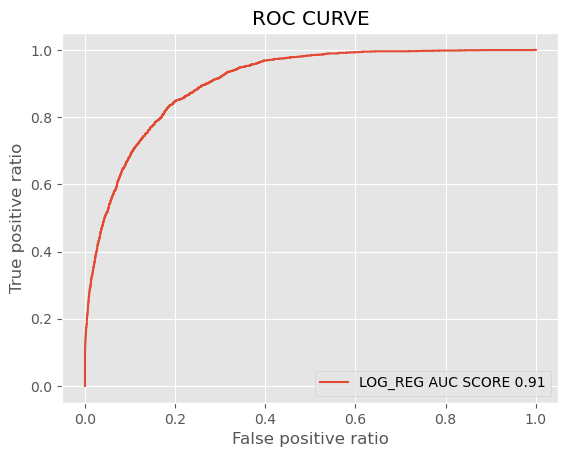

In [31]:
# Logistic Regression model performance using ROC_CURVE

fpr_log, tpr_log, thresholds = roc_curve(y_test, y_prob_proba_log)
roc_score_log = auc(fpr_log, tpr_log)

# plotting the roc_curve
plt.plot(fpr_log,tpr_log, label=f"LOG_REG AUC SCORE {roc_score_log:.2f}")
plt.ylabel("True positive ratio")
plt.xlabel("False positive ratio")
plt.title("ROC CURVE") 
plt.legend()
plt.show()

Logistic Regression confusion matrix: 
 [[6307  523]
 [ 835 1370]]


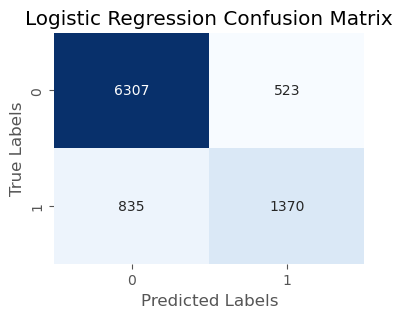

In [32]:
# Confusion matrix Logistic Regression

logr_cm = confusion_matrix(y_test,y_pred_log)
print("Logistic Regression confusion matrix: \n",logr_cm)
plt.figure(figsize=(4,3))
sns.heatmap(logr_cm, annot=True, fmt="d", cmap="Blues",cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Comparing random forest and logistic regression model performance using ROC CURVE

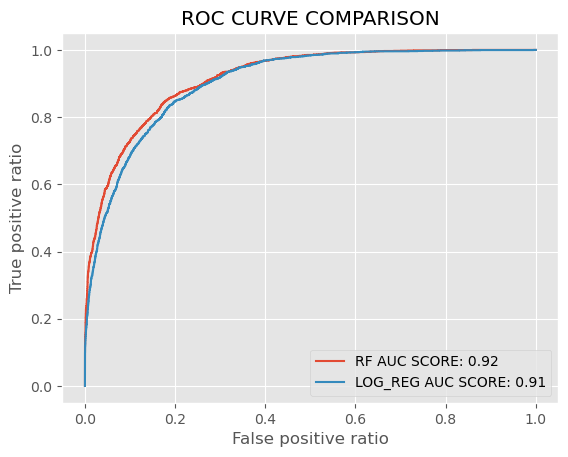

In [33]:
# plotting the roc_curve
plt.plot(fpr,tpr,  label=f"RF AUC SCORE: {roc_score_rf:.2f}")
plt.plot(fpr_log,tpr_log, label=f"LOG_REG AUC SCORE: {roc_score_log:.2f}")

plt.ylabel("True positive ratio") # y axis label
plt.xlabel("False positive ratio") # x axis label
plt.title("ROC CURVE COMPARISON") # chart title
plt.legend() # Legend
plt.show() # show chart

### Save model for future use

In [ ]:
pip install joblib

In [ ]:
import joblib, pickle

In [ ]:
# using joblib to save rf model

joblib.dump(rf_model,"rf_income_model.pkl")

In [ ]:
# using joblin to save logistic regression model
joblib.dump(logr_model,"logr_income_model.pkl")

### Summary and Recommendation

- **Gender Distribution :** There is a significantly higher number of males compared to females. This shows that male are overrepresented than the female. The data collection should 
- **Age Distribution Chart :** The distribution peaks around the age of 35–40 years and gradually decreases beyond that, with fewer people in the older age groups (60+). This is suggesting that the predictive model should give weight to this age group, as they are the most economically active and likely to have varying incomes based on career progression.
- **Occupation :** People in professional specialties, executive-managerial roles, and craft-repair occupations have higher representation, indicating that certain professions have a higher likelihood of income.
- **Education Level :** Higher education correlates with higher income. Individuals with bachelor's degrees or higher are more likely to earn above $50K.


### Model Performance

1. The **Random Forest model** shows good overall performance in predicting income levels, achieving an accuracy of `86%`

a. **Class 0 (Income less than 50) :**
  - `Precision: 89% , Recall: 94%, F1 Score: 91%`.
  - This shows that the model accurately identify most of the cases that have income <=50 and rarely missclassifies them as high income earners.
    
b. **Class 1 (Income greater than 50) :**
    - `Precision: 77%, Recall: 63%, F! Score: 69%`.
    - This Shows that the model could not accurately identify all true high income earners predicting wrongly as earning <=$50


2. The **Logistic Regression model** shows good overall performance in predicting income levels, achieving an accuracy of `86%`

a. **Class 0 (Income less than 50) :**
  - `Precision: 88% , Recall: 92%, F1 Score: 90%`.
  - This shows that the model accurately identify most of the cases that have income <=50 and rarely missclassifies them as high income earners.

b. **Class 1 (Income greater than 50) :**
    - `Precision: 72%, Recall: 62%, F! Score: 67%`.
    - This Shows that the model could not accurately identify all true high income earners predicting wrongly as earning <=$50